# Stochastic processes course 2018/2019-2 @ ELTE
# Assignment 8-9: Graph theory
## 04.19.2019

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import random
import seaborn as sns
from matplotlib.patches import Circle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import statistics

sns.set_style(style='whitegrid')

steps = 1
image_path = '.\\Documentation\\src\\images\\'
image_format = 'pdf'
image_dpi = 150

# Random Recursive Tree

In [2]:
def random_recursive_tree(n_edges_rrt):
    
    # Storage for edges
    # Nth elements indicates the Nth edge
    # It connects the (N+2)th point with the point indicated by its value
    #
    # That means, that the first value of the graph_rrt array, with index "0",
    # indicates the edge between the 1. and 2. points, and thus its value is "1."
    #
    # Length: Number of points, which equals to number of edges + 1 (n_edges_rrt+1)
    graph_rrt = np.zeros((n_edges_rrt+1), dtype='int')
    
    # Degrees of vertices
    # Nth elements indicates the degree of the (N+1)th point
    #
    # Points are indexed from "1", but the first point is indicated
    # by the "0" index of the count_rrt array
    #
    # Length: Number of points, which equals to number of edges + 1 (n_edges_rrt+1)
    count_rrt = np.zeros((n_edges_rrt+1), dtype='int')
    
    # Total number of vertices with specific degrees
    # Nth element indicates the number of vertices
    # with N degrees
    #
    # Length: Number of maximum possible degrees, which equals to number of edges (n_edges_rrt)
    # +1 for zero degree
    dist_rrt = np.zeros((n_edges_rrt+1), dtype='int')
    
    # Initial conditions:
    # One point, with no edges
    dist_rrt[0] = n_edges_rrt+1  # All of the points have 0 degree yet
    
    for i in range(0, n_edges_rrt):
        
        # Choose randomly an endpoint for the edge, brought into the graph by the new vertex
        choosen_random = random.randint(1, i+1)
        graph_rrt[i] = choosen_random
        
        # Increment the degrees of the two connected point
        count_rrt[choosen_random - 1] += 1
        count_rrt[i + 1] += 1

        # Update distributions
        dist_rrt[count_rrt[choosen_random - 1]] += 1
        dist_rrt[count_rrt[i + 1]] += 1
        dist_rrt[count_rrt[choosen_random - 1] - 1] -= 1
        dist_rrt[count_rrt[i + 1] - 1] -= 1
        
    return(graph_rrt, count_rrt, dist_rrt)

In [32]:
n_edges_rrt = 100
graph_rrt, count_rrt, dist_rrt = random_recursive_tree(n_edges_rrt)

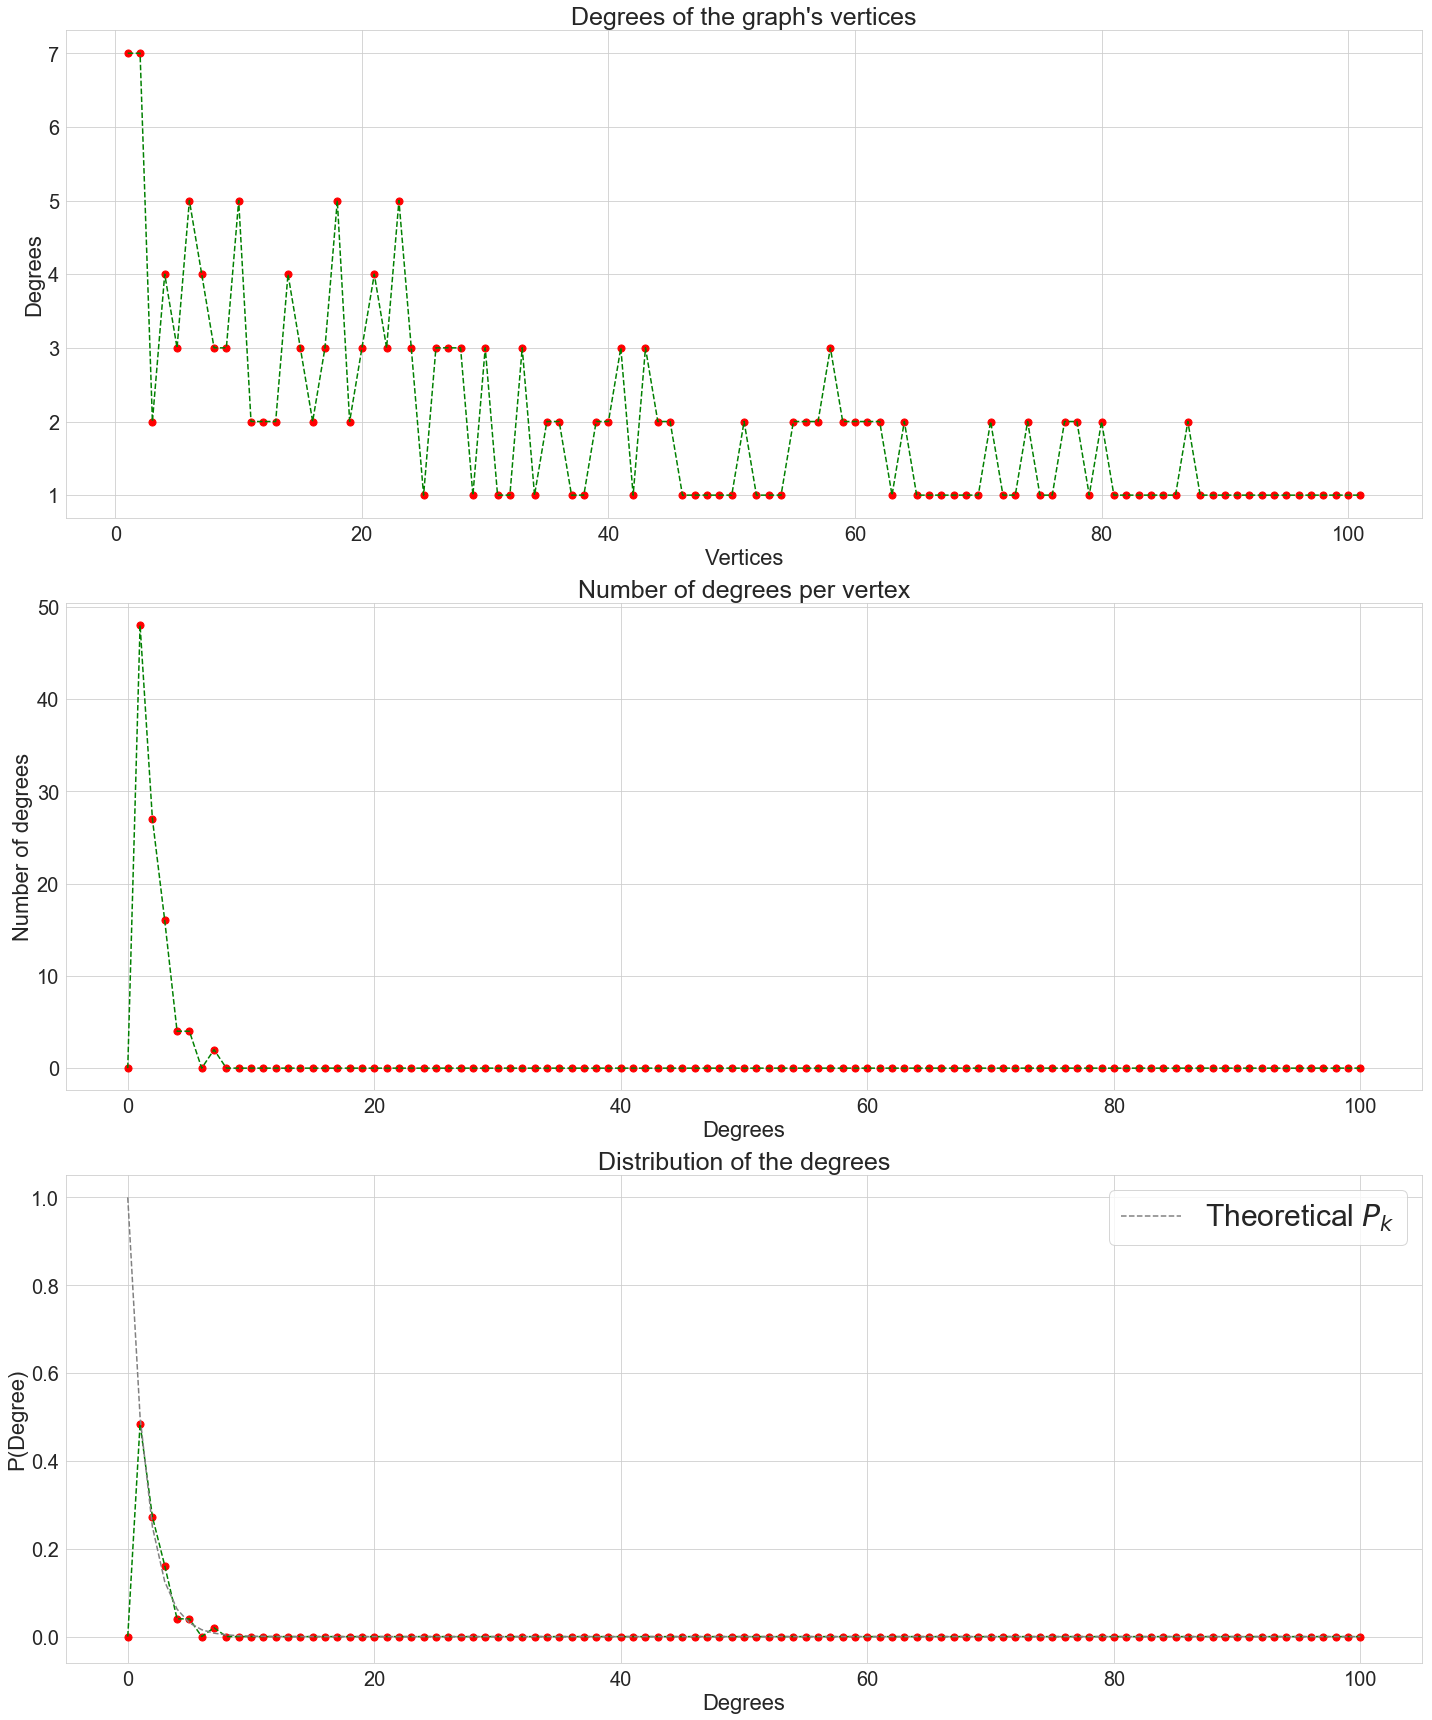

In [33]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
legendsize = 30
scattersize = 50

axes[0].scatter([k for k in range(1, n_edges_rrt+2)],
             count_rrt, color='red', s=scattersize)
axes[0].plot([k for k in range(1, n_edges_rrt+2)],
             count_rrt, color='green', linestyle='--')

axes[1].scatter([k for k in range(0, n_edges_rrt+1)],
                dist_rrt, color='red', s=scattersize)
axes[1].plot([k for k in range(0, n_edges_rrt+1)],
             dist_rrt, color='green', linestyle='--')

axes[2].scatter([k for k in range(0, n_edges_rrt+1)],
                dist_rrt/(n_edges_rrt-1), color='red', s=scattersize)
axes[2].plot([k for k in range(0, n_edges_rrt+1)],
             dist_rrt/(n_edges_rrt-1), color='green', linestyle='--')

axes[2].plot([k for k in range(0, n_edges_rrt+1)],
             [np.exp(-k * np.log(2)) for k in range(0, n_edges_rrt+1)],
             color='grey', linestyle='--', label='Theoretical $P_k$')

axes[0].set_title('Degrees of the graph\'s vertices', fontsize=titlesize)
axes[1].set_title('Number of degrees per vertex', fontsize=titlesize)
axes[2].set_title('Distribution of the degrees', fontsize=titlesize)

axes[0].set_xlabel('Vertices', fontsize=axislabelsize)
axes[0].set_ylabel('Degrees', fontsize=axislabelsize)

axes[1].set_xlabel('Degrees', fontsize=axislabelsize)
axes[1].set_ylabel('Number of degrees', fontsize=axislabelsize)

axes[2].set_xlabel('Degrees', fontsize=axislabelsize)
axes[2].set_ylabel('P(Degree)', fontsize=axislabelsize)

for i in range(0, nrows):

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

axes[2].legend(fontsize=legendsize)
    
fig.tight_layout()
plt.savefig(image_path +
            'rrt.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Errors of $P_{k}$

### Full dataset

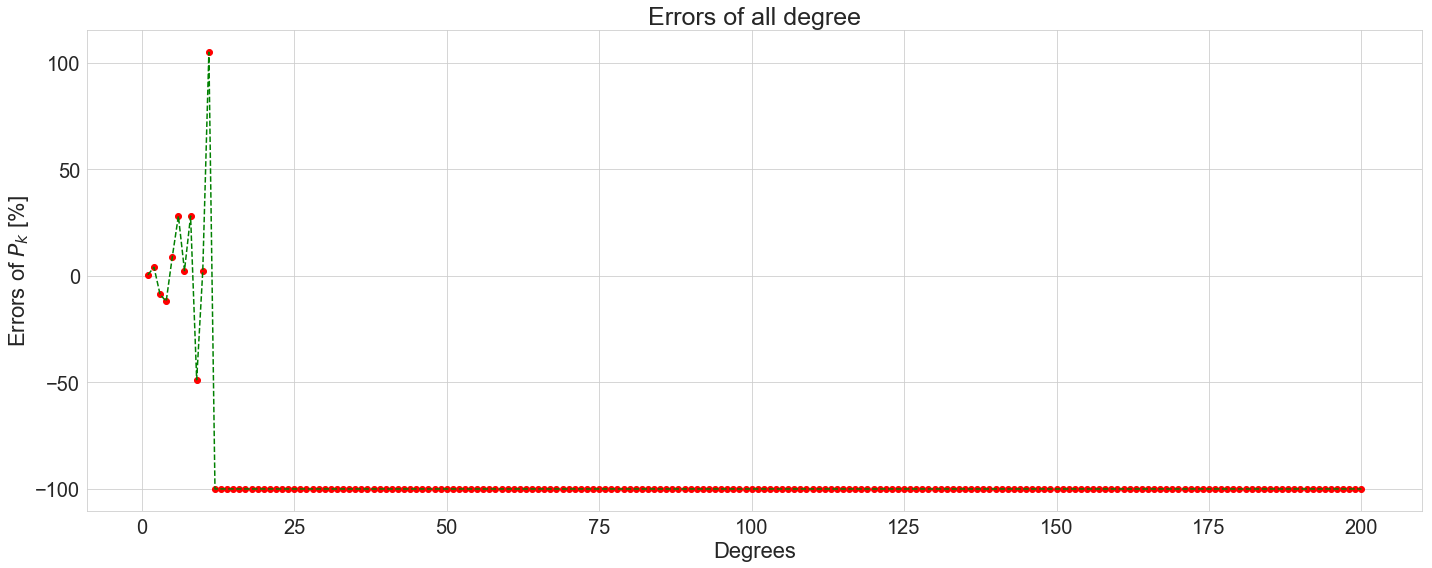

In [193]:
nrows = 1
ncols = 1
end = 200
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20

n_edges_error_rrt = 1000
graph_error_rrt, count_error_rrt, dist_error_rrt = random_recursive_tree(n_edges_error_rrt)

# Calculate difference between theoretical model and simulation
sim_p = dist_error_rrt[1:]/(n_edges_error_rrt-1)
theor_p = np.array([np.exp(-k * np.log(2)) for k in range(1, n_edges_error_rrt+1)])
diff = sim_p - theor_p

# Suppress 'RuntimeWarning: invalid value encountered in divide' warnings
# They naturally pops up, when the 'diff/theor_p' is overflowing the floating-point accuracy
with np.errstate(divide='ignore',invalid='ignore'):
    axes.scatter([k for k in range(1, n_edges_error_rrt+1)][:end],
                 diff[:end]/theor_p[:end]*100, color='red')
    
    axes.plot([k for k in range(1, n_edges_error_rrt+1)][:end],
              diff[:end]/theor_p[:end]*100, color='green', ls='--')

axes.set_title('Errors of all degree', fontsize=titlesize)

axes.set_xlabel('Degrees', fontsize=axislabelsize)
axes.set_ylabel('Errors of $P_{k}$ [%]', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'rrt_error_full.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

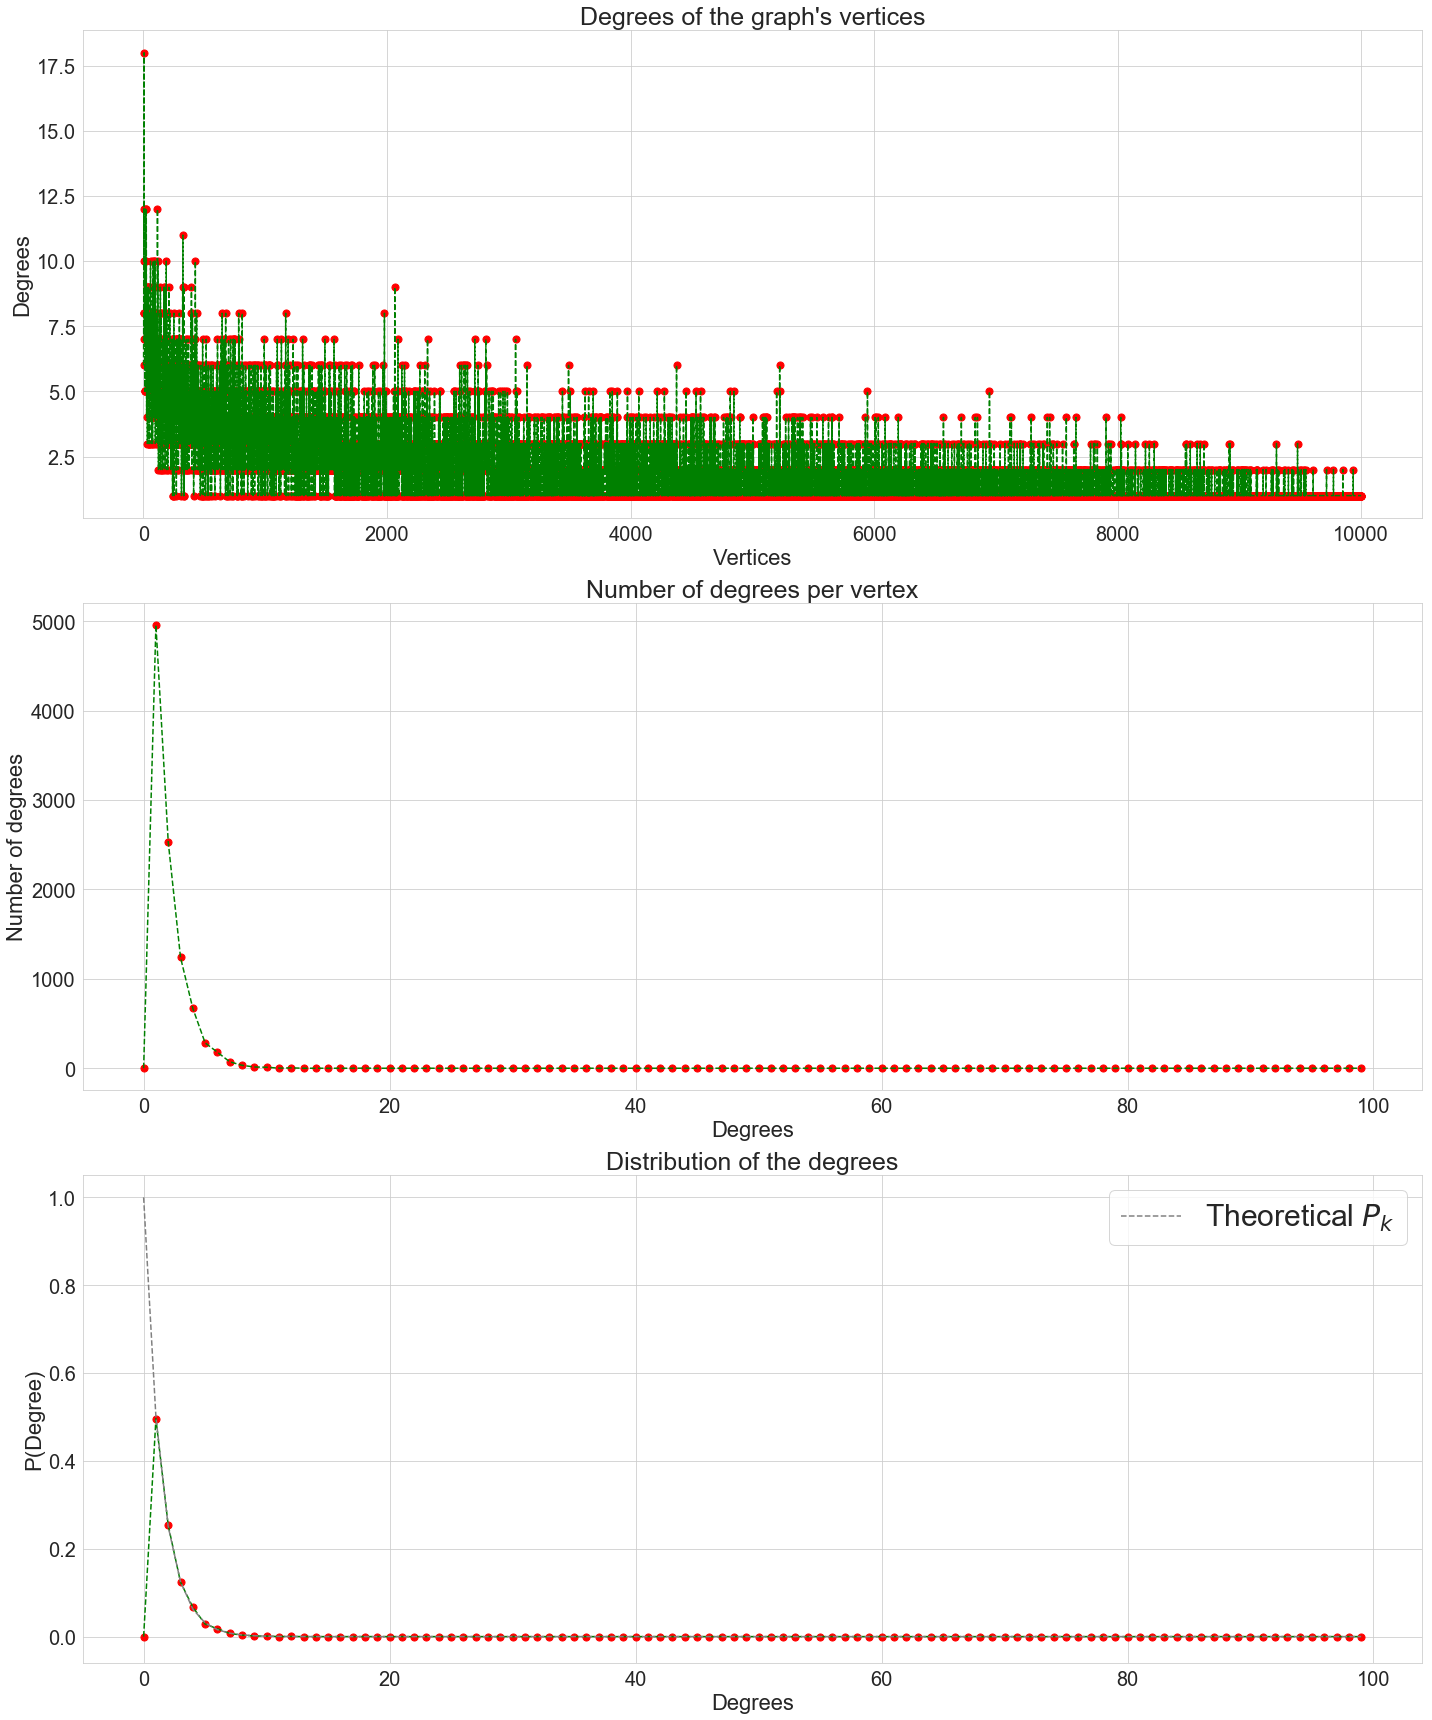

In [90]:
nrows = 3
ncols = 1
end = 100
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
legendsize = 30
scattersize = 50

axes[0].scatter([k for k in range(1, n_edges_error_rrt+2)],
             count_error_rrt, color='red', s=scattersize)
axes[0].plot([k for k in range(1, n_edges_error_rrt+2)],
             count_error_rrt, color='green', linestyle='--')

axes[1].scatter([k for k in range(0, n_edges_error_rrt+1)][:end],
                dist_error_rrt[:end], color='red', s=scattersize)
axes[1].plot([k for k in range(0, n_edges_error_rrt+1)][:end],
             dist_error_rrt[:end], color='green', linestyle='--')

axes[2].scatter([k for k in range(0, n_edges_error_rrt+1)][:end],
                dist_error_rrt[:end]/(n_edges_error_rrt-1), color='red', s=scattersize)
axes[2].plot([k for k in range(0, n_edges_error_rrt+1)][:end],
             dist_error_rrt[:end]/(n_edges_error_rrt-1), color='green', linestyle='--')

axes[2].plot([k for k in range(0, n_edges_error_rrt+1)][:end],
             [np.exp(-k * np.log(2)) for k in range(0, n_edges_error_rrt+1)][:end],
             color='grey', linestyle='--', label='Theoretical $P_k$')

axes[0].set_title('Degrees of the graph\'s vertices', fontsize=titlesize)
axes[1].set_title('Number of degrees per vertex', fontsize=titlesize)
axes[2].set_title('Distribution of the degrees', fontsize=titlesize)

axes[0].set_xlabel('Vertices', fontsize=axislabelsize)
axes[0].set_ylabel('Degrees', fontsize=axislabelsize)

axes[1].set_xlabel('Degrees', fontsize=axislabelsize)
axes[1].set_ylabel('Number of degrees', fontsize=axislabelsize)

axes[2].set_xlabel('Degrees', fontsize=axislabelsize)
axes[2].set_ylabel('P(Degree)', fontsize=axislabelsize)

for i in range(0, nrows):

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

axes[2].legend(fontsize=legendsize)
    
fig.tight_layout()
plt.show()

### First 10 degrees

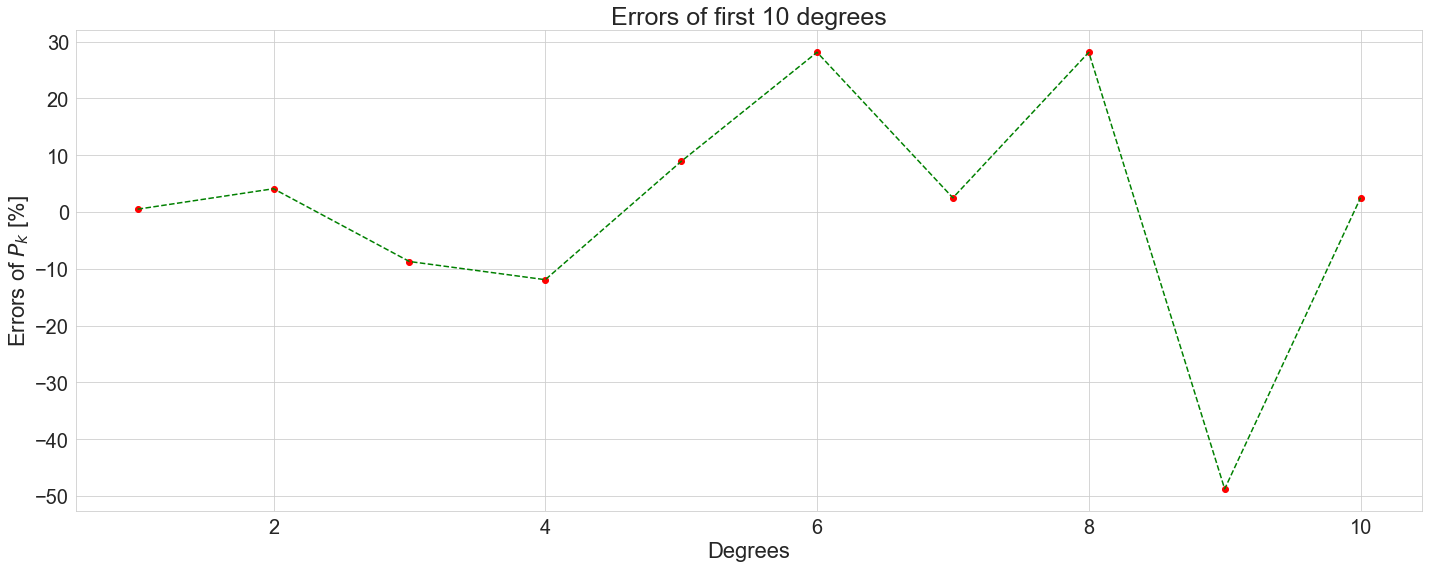

In [197]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20

# Calculate difference between theoretical model and simulation
sim_p = (dist_error_rrt[1:]/(n_edges_error_rrt-1))[:10]
theor_p = np.array([np.exp(-k * np.log(2)) for k in range(1, n_edges_error_rrt+1)][:10])
diff = sim_p - theor_p

# Suppress 'RuntimeWarning: invalid value encountered in divide' warnings
# They naturally pops up, when the 'diff/theor_p' is overflowing the floating-point accuracy
with np.errstate(divide='ignore',invalid='ignore'):
    axes.scatter([k for k in range(1, n_edges_error_rrt+1)][:10],
                 (diff/theor_p*100), color='red')
    
    axes.plot([k for k in range(1, n_edges_error_rrt+1)][:10],
              (diff/theor_p*100), color='green', ls='--')

axes.set_title('Errors of first 10 degrees', fontsize=titlesize)

axes.set_xlabel('Degrees', fontsize=axislabelsize)
axes.set_ylabel('Errors of $P_{k}$ [%]', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'rrt_error.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

### Maximal error propagation

In [123]:
maxerror_runs_rrt_min = 100
maxerror_runs_rrt_max = 30000

steps_maxerror_rrt = 10
propag_maxerror_rrt = 10

sampling_maxerror_rrt = [k for k in range(maxerror_runs_rrt_min, maxerror_runs_rrt_max)][::steps_maxerror_rrt]
length_maxerror_rrt = len(sampling_maxerror_rrt)

maxerror_rrt = np.zeros((length_maxerror_rrt))

j = 0
for i in sampling_maxerror_rrt:
    _, _, dist_rrt_current = random_recursive_tree(i)

    sim_p = (dist_rrt_current[1:]/(i-1))[:propag_maxerror_rrt]
    theor_p = np.array([np.exp(-k * np.log(2)) for k in range(1, i+1)][:propag_maxerror_rrt])
    diff = sim_p - theor_p

    maxerror_rrt[j] = np.max(np.abs(diff/theor_p*100))
    
    sys.stdout.write('\rCurrent:\t{0}/{1}\t{2}'.format(j+1, length_maxerror_rrt, maxerror_rrt[j]))
    sys.stdout.flush()
    
    j += 1

Current:	2990/2990	12.681316482710336

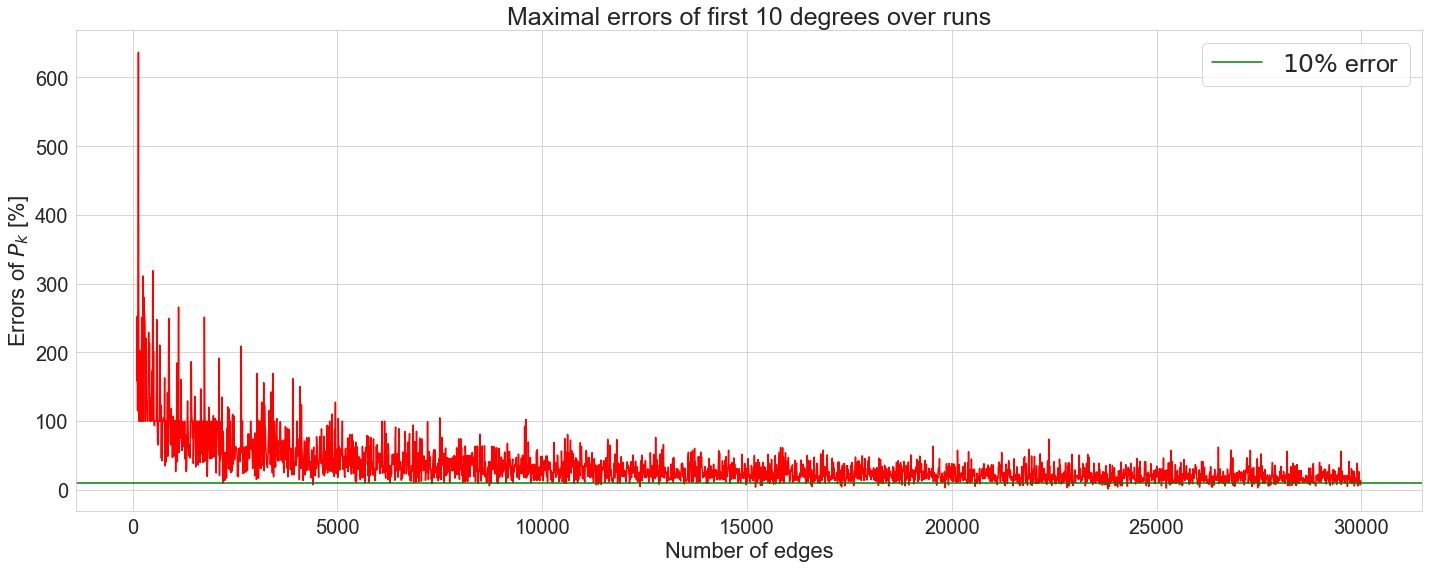

In [190]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
legendsize = 25

# Calculate difference between theoretical model and simulation
sim_p = (dist_rrt[1:]/(n_edges_rrt-1))[:propag_maxerror_rrt]
theor_p = np.array([np.exp(-k * np.log(2)) for k in range(1, n_edges_rrt+1)][:propag_maxerror_rrt])
diff = sim_p - theor_p

# Suppress 'RuntimeWarning: invalid value encountered in divide' warnings
# They naturally pops up, when the 'diff/theor_p' is overflowing the floating-point accuracy
with np.errstate(divide='ignore',invalid='ignore'):
    axes.plot([k for k in range(maxerror_runs_rrt_min, maxerror_runs_rrt_max)][::steps_maxerror_rrt],
              maxerror_rrt, color='red')

axes.axhline(y=propag_maxerror_rrt, color='green', label='$10\%$ error')
    
axes.set_title('Maximal errors of first 10 degrees over runs', fontsize=titlesize)

axes.set_xlabel('Number of edges', fontsize=axislabelsize)
axes.set_ylabel('Errors of $P_{k}$ [%]', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(fontsize=legendsize)

fig.tight_layout()
plt.savefig(image_path +
            'rrt_error_propag.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Mean degree of vertices

In [7]:
mean_runs_rrt_min = 100
mean_runs_rrt_max = 15000
mean_runs_rrt = mean_runs_rrt_max - mean_runs_rrt_min

degree_means_rrt = np.zeros((mean_runs_rrt))

for i in range(0, mean_runs_rrt):
    _, count_rrt_current, _ = random_recursive_tree(i + mean_runs_rrt_min)
    degree_means_rrt[i] = np.mean(count_rrt_current)

    sys.stdout.write('\rCurrent:\t{0}/{1}\t{2}'.format(i+1, mean_runs_rrt, degree_means_rrt[i]))
    sys.stdout.flush()

Current:	14900/14900	1.9998666666666667

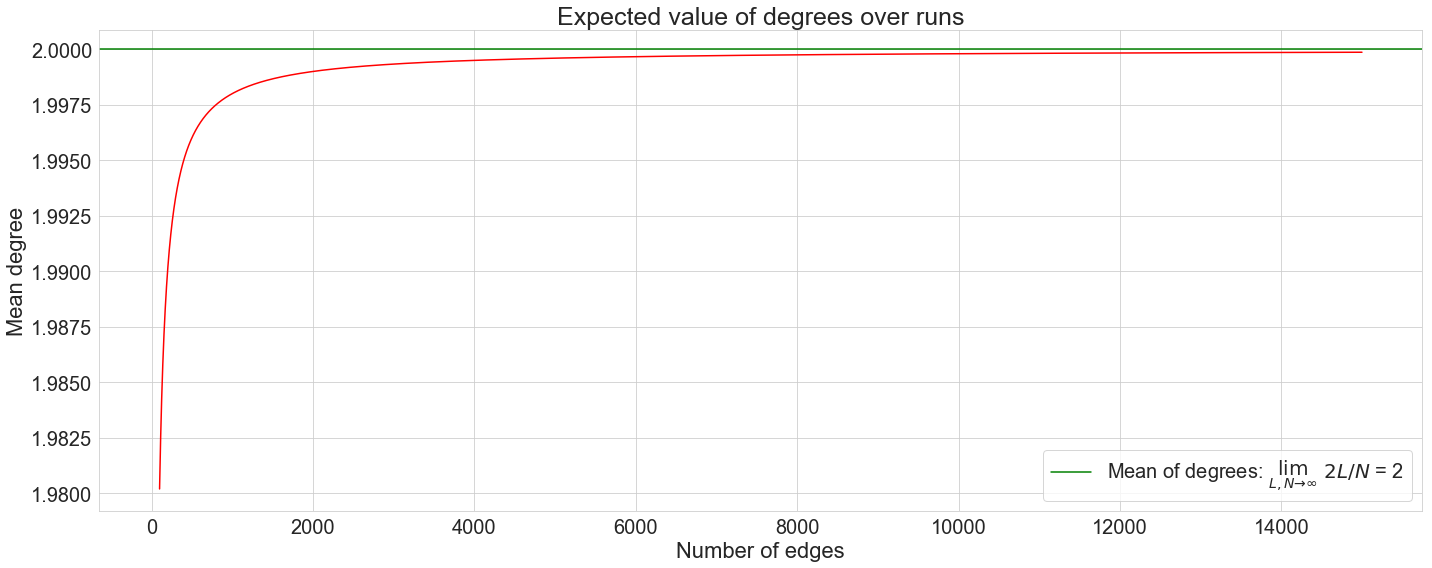

In [189]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
legendsize = 20

axes.plot([k for k in range(mean_runs_rrt_min, mean_runs_rrt_max)],
             degree_means_rrt, color='red')

axes.axhline(y=2*1e10/(1e10+1),
                label='Mean of degrees: $\lim_{L,N \\to \infty}\ 2L/N$ = %.0f' % (2*1e20/(1e20+1)),
                color='green')

axes.set_title('Expected value of degrees over runs', fontsize=titlesize)

axes.set_xlabel('Number of edges', fontsize=axislabelsize)
axes.set_ylabel('Mean degree', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(fontsize=legendsize)
    
fig.tight_layout()
plt.savefig(image_path +
            'rrt_mean.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Maximum degree, respect to edges

In [200]:
degree_runs_rrt_min = 100
degree_runs_rrt_max = 20000

steps_max_rrt = 20

sampling_max_rrt = [k for k in range(degree_runs_rrt_min, degree_runs_rrt_max)][::steps_max_rrt]
length_max_rrt = len(sampling_max_rrt)

max_degree_rrt = np.zeros((length_max_rrt))

j = 0
for i in sampling_max_rrt:
    _, count_rrt_current, _ = random_recursive_tree(i)
    max_degree_rrt[j] = np.max(count_rrt_current)

    sys.stdout.write('\rCurrent:\t{0}/{1}\t{2}'.format(j+1, length_max_rrt, max_degree_rrt[j]))
    sys.stdout.flush()
    
    j += 1

Current:	995/995	13.0

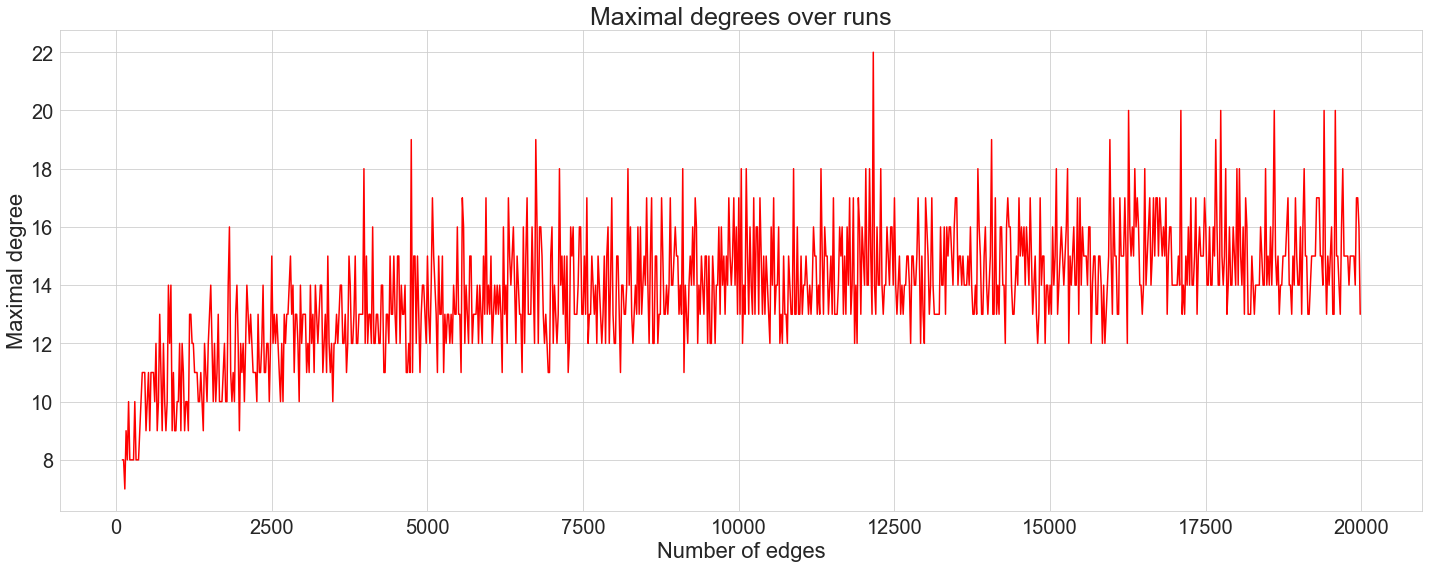

In [201]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20

axes.plot([k for k in range(degree_runs_rrt_min, degree_runs_rrt_max)][::steps_max_rrt],
          max_degree_rrt[::steps], color='red')

axes.set_title('Maximal degrees over runs', fontsize=titlesize)

axes.set_xlabel('Number of edges', fontsize=axislabelsize)
axes.set_ylabel('Maximal degree', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'rrt_maxdegrees.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

### Mean of maximum degrees

In [202]:
degree_mean_runs_rrt_min = 100
degree_mean_runs_rrt_max = 20000

all_mean_runs_rrt = 15

steps_mean_rrt = 20

sampling_mean_rrt = [k for k in range(degree_mean_runs_rrt_min, degree_mean_runs_rrt_max)][::steps_mean_rrt]
length_mean_rrt = len(sampling_mean_rrt)

mean_degree_rrt = np.zeros((length_mean_rrt))

j = 0
for i in sampling_mean_rrt:
    runs_rrt = 0
    current_max = 0
    while(runs_rrt < all_mean_runs_rrt):
        _, count_rrt_current, _ = random_recursive_tree(i)
        current_max += np.max(count_rrt_current)

        sys.stdout.write('\rCurrent:\t{0}/{1}\t{2}/{3}'.format(j+1, length_mean_rrt, runs_rrt+1, all_mean_runs_rrt))
        sys.stdout.flush()

        runs_rrt += 1
    
    # Calculate mean of previous maxes
    mean_degree_rrt[j] = current_max/all_mean_runs_rrt
    
    # Step for number of E edges
    j += 1

Current:	995/995	15/15

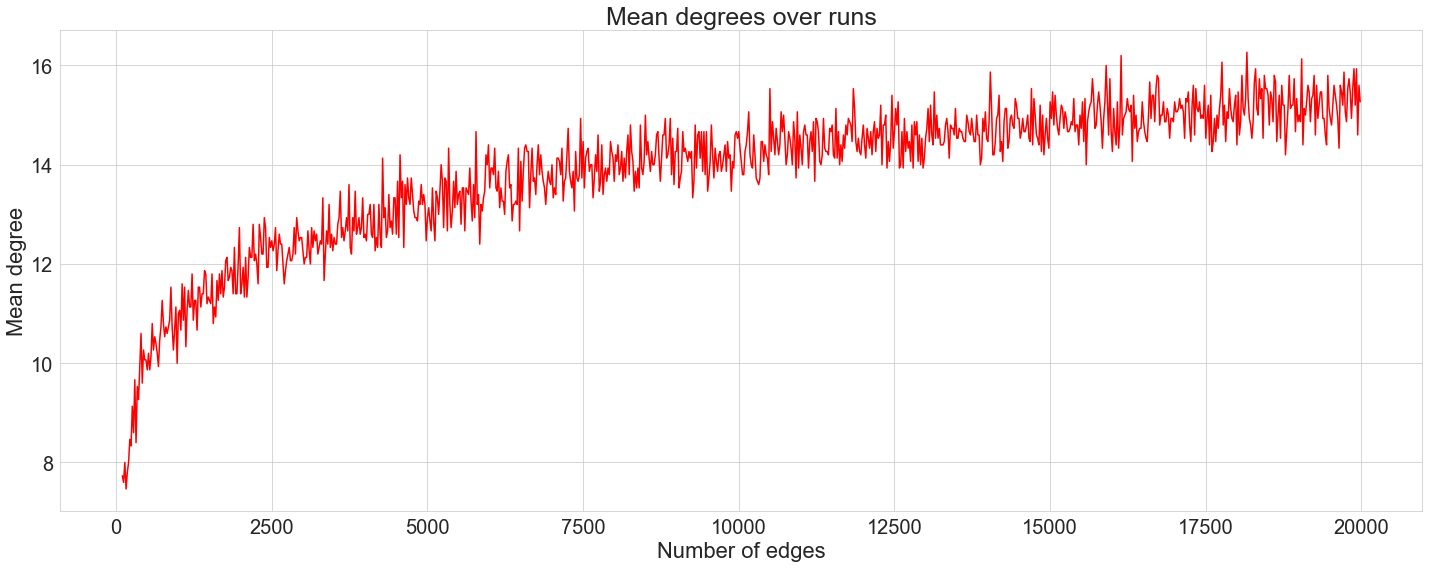

In [203]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20

axes.plot([k for k in range(degree_mean_runs_rrt_min, degree_mean_runs_rrt_max)][::steps_mean_rrt],
          mean_degree_rrt[::steps], color='red')

axes.set_title('Mean degrees over runs', fontsize=titlesize)

axes.set_xlabel('Number of edges', fontsize=axislabelsize)
axes.set_ylabel('Mean degree', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'rrt_meandegrees.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

# Anti-Preferential Attachment Model (Anti-Barabási-Albert model)

In [168]:
def anti_pref_graph(n_edges_apm, current_index=0, all_index=1):
    
    # Storage for edges
    # Nth elements indicates the Nth edge
    # It connects the (N+2)th point with the point indicated by its value
    #
    # That means, that the first value of the graph_apm array, with index "0",
    # indicates the edge between the 1. and 2. points, and thus its value is "1."
    #
    # Length: Number of points, which equals to number of edges + 1 (n_edges_apm+1)
    graph_apm = np.zeros((n_edges_apm+1), dtype='int')
    
    # Degrees of vertices
    # Nth elements indicates the degree of the (N+1)th point
    #
    # Points are indexed from "1", but the first point is indicated
    # by the "0" index of the count_apm array
    #
    # Length: Number of points, which equals to number of edges + 1 (n_edges_apm+1)
    count_apm = np.zeros((n_edges_apm+1), dtype='int')
    
    # Total number of vertices with specific degrees
    # Nth element indicates the number of vertices
    # with N degrees
    #
    # Length: Number of maximum possible degrees, which equals to number of edges (n_edges_apm)
    # +1 for zero degree
    dist_apm = np.zeros((n_edges_apm+1), dtype='int')
    
    # Initial conditions:
    # 2 points, with 1 connected edge
    graph_apm[0] = 1              # The second point is connected to the first one
    count_apm[0] = 1              # The first point has 1 degree
    count_apm[1] = 1              # The second point has 1 degree
    dist_apm[0] = n_edges_apm+1-2 # There are (total number of points - 2) points with 0 degree yet
    dist_apm[1] = 2               # There are two point with 1 degree yet

    count_edges = 1
    while(count_edges < n_edges_apm):
        
        # Choose an endpoint for the edge, brought into the graph by the new vertex
        # Anti-preferencial attachment process
        choosen_random = random.randint(1, count_edges+1)
        
        # Degree of choosen point
        choosen_degree = float(count_apm[choosen_random - 1])
        
        # Norm factor (A_norm)
        # A = sum_(l=1)^(N) l^(-2) * N_l
        A_norm = 0
        
        count_zeros = 0
        for i in range(1, n_edges_apm):
            if(dist_apm[i] != 0):
                A_norm += dist_apm[i]*i**(-2)
            else:
                count_zeros += 1
                
            if(count_zeros == 5):
                break
        
        # Transistions rate (w_k)
        # w_k = k^(-2) / A
        w_current = choosen_degree**(-2) / A_norm
        
        if(w_current > random.random()):

            graph_apm[count_edges] = choosen_random

            # Increment the degrees of the two connected point
            count_apm[choosen_random - 1] += 1
            count_apm[count_edges + 1] += 1
            
            # Update distributions
            dist_apm[count_apm[choosen_random - 1]] += 1
            dist_apm[count_apm[count_edges + 1]] += 1
            dist_apm[count_apm[choosen_random - 1] - 1] -= 1
            dist_apm[count_apm[count_edges + 1] - 1] -= 1
            
            # Increment total number of edges
            count_edges += 1
            
            sys.stdout.write('\rCurrent:\t{0}/{1}\t\t{2}/{3}'.format(count_edges, n_edges_apm, current_index+1, all_index))
            sys.stdout.flush()

    return(graph_apm, count_apm, dist_apm)

In [169]:
n_edges_apm = 450
graph_apm, count_apm, dist_apm = anti_pref_graph(n_edges_apm)

Current:	450/450		1/1

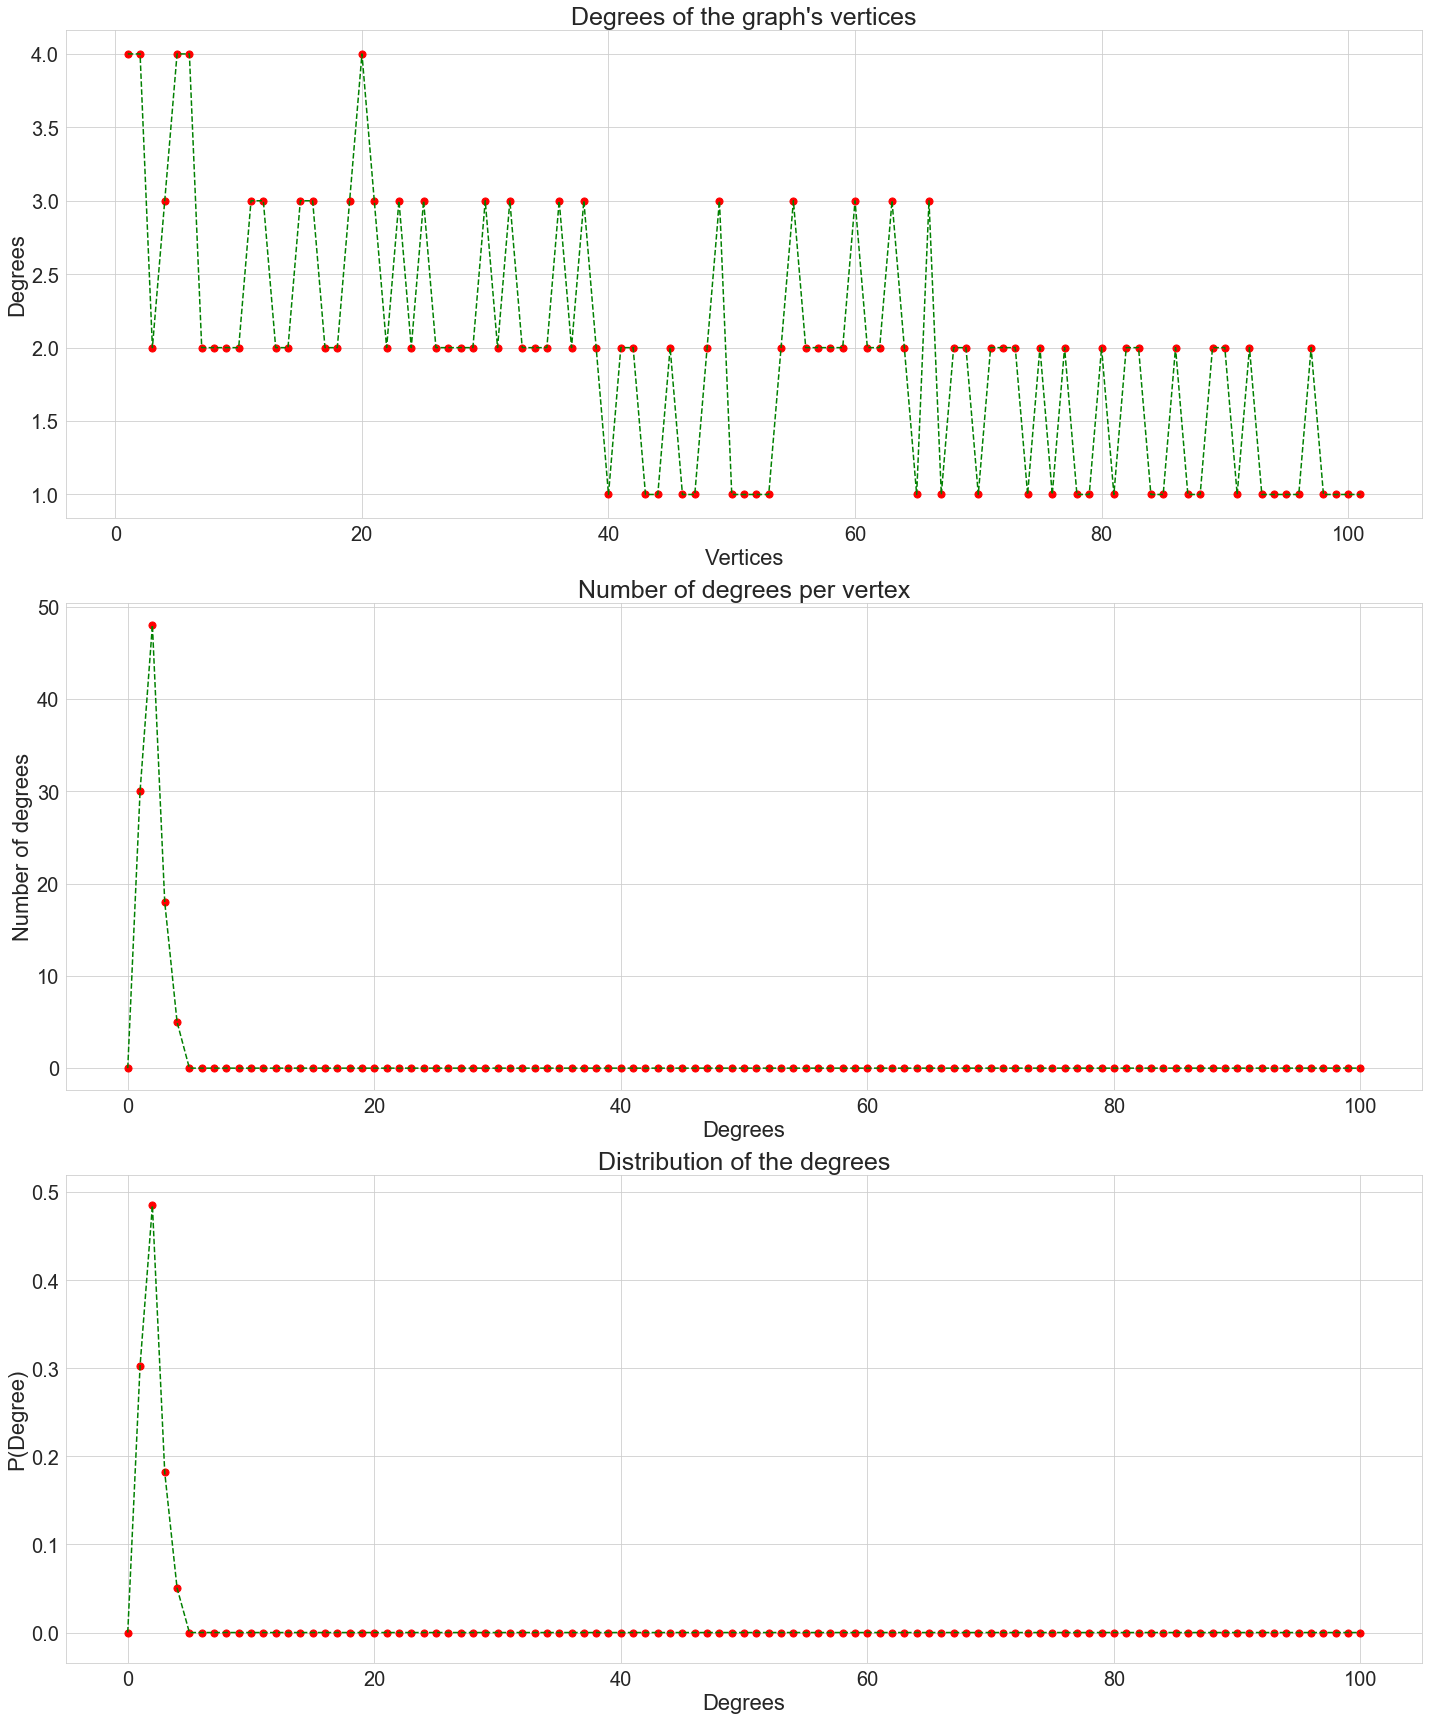

In [128]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
scattersize = 50

axes[0].scatter([k for k in range(1, n_edges_apm+2)],
             count_apm, color='red', s=scattersize)
axes[0].plot([k for k in range(1, n_edges_apm+2)],
             count_apm, color='green', linestyle='--')

axes[1].scatter([k for k in range(0, n_edges_apm+1)],
                dist_apm, color='red', s=scattersize)
axes[1].plot([k for k in range(0, n_edges_apm+1)],
             dist_apm, color='green', linestyle='--')

axes[2].scatter([k for k in range(0, n_edges_apm+1)],
                dist_apm/(n_edges_apm-1), color='red', s=scattersize)
axes[2].plot([k for k in range(0, n_edges_apm+1)],
             dist_apm/(n_edges_apm-1), color='green', linestyle='--')

axes[0].set_title('Degrees of the graph\'s vertices', fontsize=titlesize)
axes[1].set_title('Number of degrees per vertex', fontsize=titlesize)
axes[2].set_title('Distribution of the degrees', fontsize=titlesize)

axes[0].set_xlabel('Vertices', fontsize=axislabelsize)
axes[0].set_ylabel('Degrees', fontsize=axislabelsize)

axes[1].set_xlabel('Degrees', fontsize=axislabelsize)
axes[1].set_ylabel('Number of degrees', fontsize=axislabelsize)

axes[2].set_xlabel('Degrees', fontsize=axislabelsize)
axes[2].set_ylabel('P(Degree)', fontsize=axislabelsize)

for i in range(0, nrows):

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'apm.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Mean degree of vertices

In [15]:
mean_runs_apm_min = 100
mean_runs_apm_max = 200
mean_runs_apm = mean_runs_apm_max - mean_runs_apm_min

degree_means_apm = np.zeros((mean_runs_apm))

for i in range(0, mean_runs_apm):
    _, count_apm_current, _ = anti_pref_graph(i + mean_runs_apm_min, i, mean_runs_apm)
    degree_means_apm[i] = np.mean(count_apm_current)

Current:	100/100	1.999497487437185

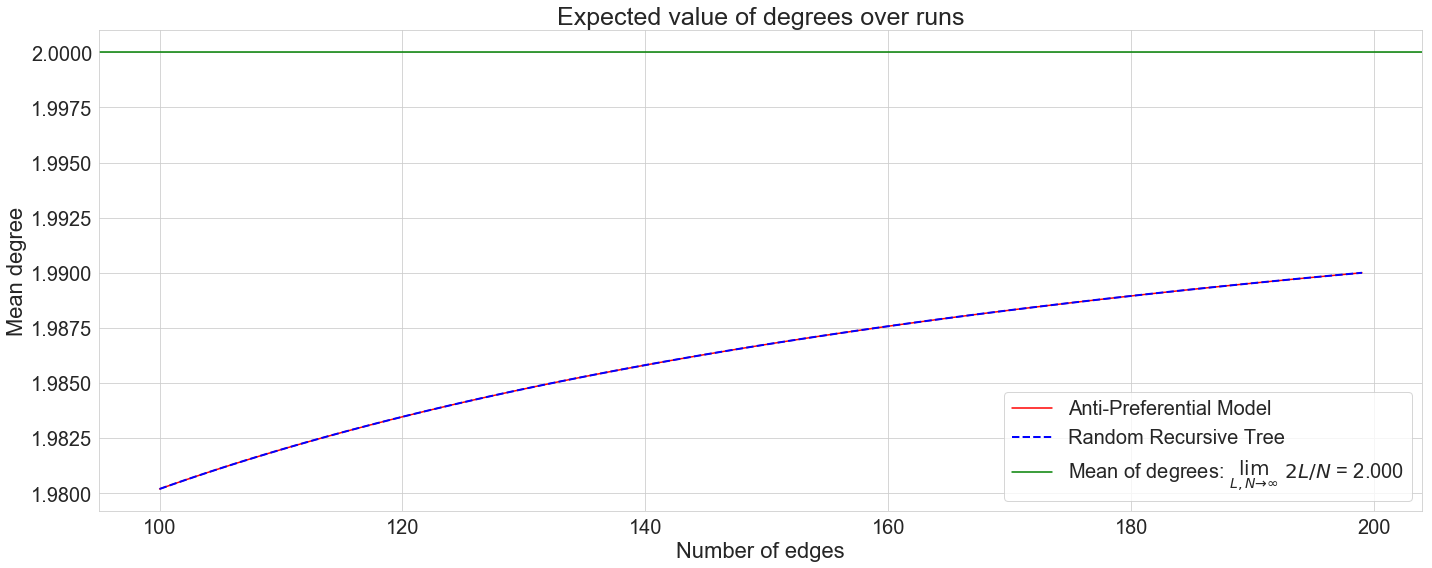

In [188]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
legendsize = 20

axes.plot([k for k in range(mean_runs_apm_min, mean_runs_apm_max)],
             degree_means_apm, color='red', label='Anti-Preferential Model')

axes.plot([k for k in range(mean_runs_apm_min, mean_runs_apm_max)],
             degree_means_rrt[0:mean_runs_apm], color='blue', lw=2, linestyle='--', label='Random Recursive Tree')

axes.axhline(y=2*1e10/(1e10+1),
                label='Mean of degrees: $\lim_{L,N \\to \infty}\ 2L/N$ = %.3f' % (2*1e20/(1e20+1)),
                color='green')

axes.set_title('Expected value of degrees over runs', fontsize=titlesize)

axes.set_xlabel('Number of edges', fontsize=axislabelsize)
axes.set_ylabel('Mean degree', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(fontsize=legendsize)

fig.tight_layout()
plt.savefig(image_path +
            'apm_mean.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Maximum degree, respect to edges

In [172]:
degree_runs_apm_min = 100
degree_runs_apm_max = 2000

steps_max_apm = 5

sampling_max_apm = [k for k in range(degree_runs_apm_min, degree_runs_apm_max)][::steps_max_apm]
length_max_apm = len(sampling_max_apm)

max_degree_apm = np.zeros((length_max_apm))

j = 0
for i in sampling_max_apm:
    _, count_apm_current, _ = anti_pref_graph(i, j, length_max_apm)
    max_degree_apm[j] = np.max(count_apm_current)
    
    j += 1

Current:	1995/1995		380/380

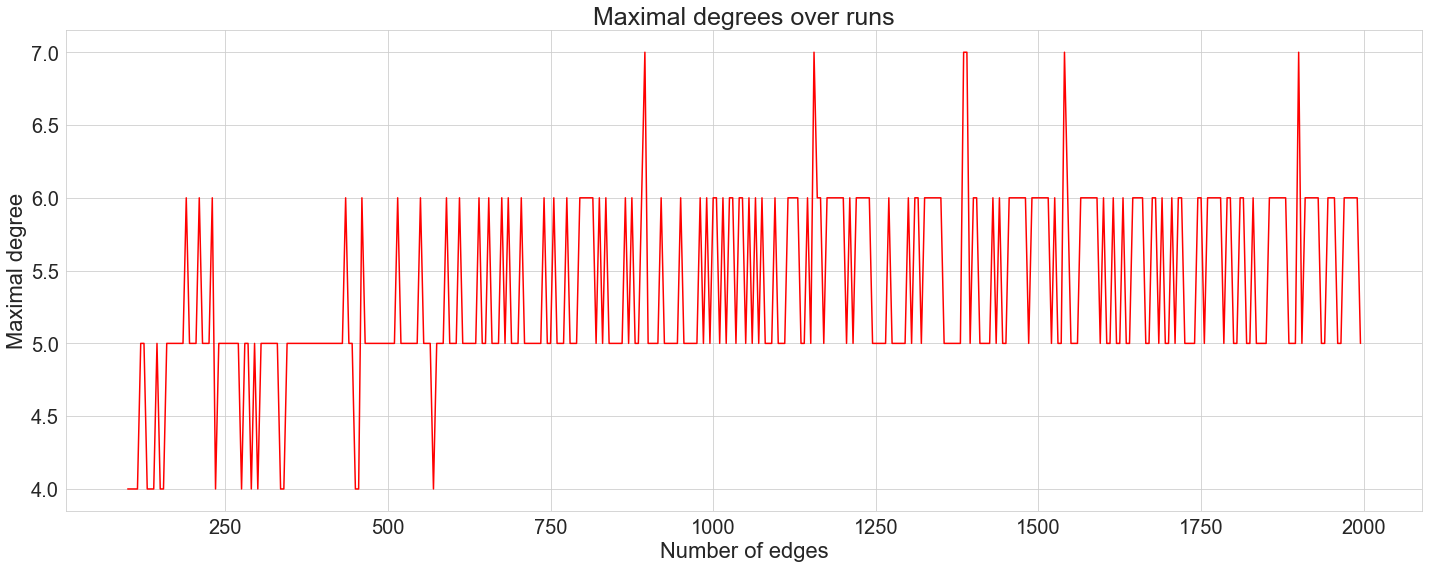

In [174]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20

axes.plot([k for k in range(degree_runs_apm_min, degree_runs_apm_max)][::steps_max_apm],
             max_degree_apm, color='red')

axes.set_title('Maximal degrees over runs', fontsize=titlesize)

axes.set_xlabel('Number of edges', fontsize=axislabelsize)
axes.set_ylabel('Maximal degree', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'apm_maxdegrees.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()